# Feuille de travaux pratiques. Résolution numérique d'équations non linéaires

In [20]:
# chargement des bibliothèques
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (méthodes de dichotomie et de Newton-Raphson, d'après A. Quarteroni)

Dans cet exercice, on souhaite utiliser sur des exemples différentes méthodes d'approximation d'un zéro d'une fonction.

**1.** On considère tout d'abord la fonction
$$
f(x)=\frac{x}{2}-\sin(x)+\frac{\pi}{6}-\frac{\sqrt{3}}{2}
$$
sur l'intervalle $\left[-\frac{\pi}{2},\pi\right]$, en observant qu'elle y possède deux zéros.

**(a)** &Eacute;crire une fonction `f` prenant en entrée un réel $x$ et renvoyant la valeur de $f(x)$.

In [21]:
def f(x):
    return x/2-math.sin(x)+math.pi/6-math.sqrt(3)/2

print(f(-math.pi/3))
print(f(2.24601))


0.0
4.9623149944721945e-06


**(b)** À l'aide du graphe de la fonction $f$ sur $\left[-\frac{\pi}{2},\pi\right]$, expliquer pourquoi la [méthode de dichotomie](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie) ne peut être utilisée que pour approcher l'un des deux zéros de $f$, que l'on notera $\xi$ dans la suite.

In [22]:
La méthode de dichotomie a besoin de changer de signe. On remarque que le seul zéro où la fonction change de signe est environ 2.246 .

SyntaxError: invalid syntax (2506772908.py, line 1)

**(c)** Écrire une fonction `[zero,iter,res,inc]=dichotomie(f,a,b,tol,itermax)` mettant en &oelig;uvre la méthode de dichotomie pour l'approximation d'un zéro d'une fonction $f$ donnée, compris dans un intervalle $[a,b]$ tel que $f(a)f(b)<0$. En plus de la fonction et des bornes de l'intervalle, les autre paramètres d'entrée seront une tolérance `tol` pour le critère d'arrêt de la méthode et un nombre maximum `itermax` d'itérations à effectuer. Elle reverra en sortie l'approximation du zéro obtenue `zero`, le nombre d'itérations
nécessaire au calcul de cette approximation `iter`, la valeur `res` de la fonction $f$ en cette approximationt et un vecteur `inc` contenant la suite des valeurs absolues des différences entre deux approximations successives (dite suite des incréments). On réfléchira au choix du critère d'arrêt à employer.

In [23]:
def dichotomie(f,a,b,tol,itermax):
    z=(a+b)/2
    inc=[f(z)]
    cpt=0
    while cpt<=itermax and abs(a-b)>tol:
        if f(a)*f(z)<0:
            b=z
        else:
            a=z
        z=(a+b)/2
        inc.append(z)
        inc[cpt]=abs(inc[cpt]-inc[cpt+1])
        cpt+=1
    return(z,cpt,f(z),inc)


**(d)** Utiliser la fonction `dichotomie` pour calculer une approximation de $\xi$ avec une tolérance égale à $10^{-10}$ pour le critère d'arrêt à partir du choix d'un intervalle $[a,b]$ convenable.

In [24]:
print(dichotomie(f,-math.pi/2,math.pi,1e-10,100))

(2.2460055892851916, 36, -1.4381273949481965e-11, [2.6203297361675837, 0.5890486225480864, 0.294524311274043, 0.14726215563702194, 0.07363107781851097, 0.03681553890925526, 0.018407769454627854, 0.009203884727313927, 0.004601942363656963, 0.0023009711818287037, 0.0011504855909141298, 0.0005752427954570649, 0.00028762139772853246, 0.00014381069886448827, 7.190534943202209e-05, 3.5952674716011046e-05, 1.797633735778348e-05, 8.988168679113784e-06, 4.4940843397789365e-06, 2.247042170111513e-06, 1.1235210850557564e-06, 5.617605425278782e-07, 2.808802714859837e-07, 1.4044013596503646e-07, 7.022006798251823e-08, 3.5110033991259115e-08, 1.7555016995629558e-08, 8.777508497814779e-09, 4.388754248907389e-09, 2.1943771244536947e-09, 1.0971885622268474e-09, 5.485945031580286e-10, 2.742970295344094e-10, 1.3714895885641454e-10, 6.857447942820727e-11, 3.4287239714103634e-11, 2.2460055892851916])


**(e)** Au moyen de la commande `semilogy`, tracer le graphe de la suite des incréments $|x^{(k+1)}-x^{(k)}|$ en fonction de $k$ avec une échelle semilogarithmique et déterminer la loi selon laquelle ces quantités tendent vers $0$ quand $k$ tend vers l'infini.

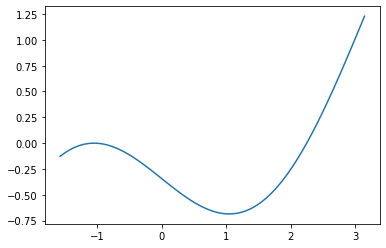

In [25]:
x=np.linspace(-math.pi/2,math.pi,100)
y=[f(i) for i in x]
plt.plot(x,y)
plt.show()


**(f)** Écrire une fonction `[zero,iter,res,inc]=newton(f,df,x0,tol,itermax)` qui met en &oelig;uvre la [méthode de Newton-Raphson](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton) pour l'approximation d'un zéro d'une fonction dérivable $f$ donnée. Les paramètres d'entrée `df`, `x0`, `tol` et `itermax` représenteront respectivement la fonction correspondant à la fonction dérivée $f'$, l'initialisation de la suite des approximations, la tolérance pour le critère d'arrêt de la méthode et le nombre maximum d'itérations à effectuer. En sortie, les paramètres seront identiques à ceux de la fonction `dichotomie`. La encore, on réfléchira au choix du critère d'arrêt à employer.

In [26]:
def newton(f,df,x0,tol,itermax):
    zero=x0
    cpt_iter=1
    
    inc=[]
    for i in range(itermax-1):
        res = f(zero)
        #print("iter",i,"f(zero):",f(zero))
        if (abs(f(zero))<=tol):
            #print("STOP")
            return [zero, cpt_iter, res, inc]
        errPrec=x0
        x0=x0-(f(x0)/df(x0))
        err=x0
        zero=x0
        inc.append(abs(err-errPrec))
        cpt_iter+=1
    return [zero, cpt_iter, f(zero), inc]

def g(x):
    return math.cos(x)-x**3

def dg(x):
    return -math.sin(x)-3*(x**2)


#newton(g,dg,0.5,10**(-10),150)
zero2,cpt_ite2, erreur2, inc2 = newton(g,dg,0.5,1e-10,150)
print(zero2,cpt_ite2, erreur2, inc2)
print(newton(f,df,math.pi,1e-10,100))

0.8654740331109566 6 -2.8106184046805538e-11 [0.6121416370972725, 0.20246894336046573, 0.04240887552799033, 0.00178668291055184, 3.1021873080350204e-06]
[2.2460055892984685, 5, 5.561107130347409e-13, [0.8189131324058376, 0.07481662013373169, 0.0018561177946692098, 1.1939570860874937e-06]]


**(g)** Calculer des approximations des deux zéros $\xi$ et $\zeta$ de la fonction $f$ avec la méthode de Newton-Raphson, en prenant une tolérance égale à $10^{-10}$ pour le critère d'arrêt et comme initialisations le point $\pi$ pour $\xi$ et $-\frac{\pi}{2}$ pour $\zeta$. Comparer les nombres d'itérations effectuées pour obtenir une approximation de chacun des zéros. Pourquoi sont-ils très différents ? Comparer également les graphes des suites des incréments obtenus avec la commande `semilogy`.

In [27]:
def f(x):
    return x/2-math.sin(x)+math.pi/6-math.sqrt(3)/2
def df(x):
    return 1/2-math.cos(x)
zero,ite,res,inc=newton(f,df,math.pi,1e-10,100)
print(zero,ite,res,inc)


2.2460055892984685 5 5.561107130347409e-13 [0.8189131324058376, 0.07481662013373169, 0.0018561177946692098, 1.1939570860874937e-06]


**(h)** On cherche à réduire le nombre d'itérations nécessaires à l'obtention d'une approximation du zéro négatif $\zeta$ de la fonction $f$. La méthode de Newton-Raphson modifiée, basée sur la modification suivante de la relation de récurrence de la méthode de Newton-Raphson
$$
\forall k\in\mathbb{N},\ x^{(k+1)}=x^{(k)}−2\frac{f(x^{(k)})}{f'(x^{(k)})},
$$
a une convergence quadratique si $f'(\zeta)=0$. Mettre en &oelig;uvre cette méthode dans une fonction `modnewton` et voir combien d'itérations sont nécessaires pour qu'elle fournisse une approximation de $\zeta$ avec une tolérance égale à $10^{-10}$ pour le critère d'arrêt.

In [28]:
def modnewton(f,df,x0,tol,itermax):
    zero=x0
    cpt_iter=1
    
    inc=[]
    for i in range(itermax-1):
        res = f(zero)
        #print("iter",i,"f(zero):",f(zero))
        if (abs(f(zero))<=tol):
            #print("STOP")
            return [zero, cpt_iter, res, inc]
        errPrec=x0
        x0=x0-2*(f(x0)/df(x0))
        err=x0
        zero=x0
        inc.append(abs(err-errPrec))
        cpt_iter+=1
    return [zero, cpt_iter, f(zero), inc]

zero2,cpt_ite2, erreur2, inc2 = modnewton(f,df,math.pi,1e-10,150)
print(zero2,cpt_ite2, erreur2, inc2)

-1.0471982061253842 6 -1.857403120197887e-13 [1.6378262648116755, 2.717183665953814, 5.452653046836346, 0.181892626416021, 0.0026121595630088645]


**2.** On considère à présent la fonction $g(x)=x+e^{-20\,x^2}\cos(x)$, dont on veut approcher les zéros par la méthode de Newton-Raphson.

**(a)** &Eacute;crire une fonction `g` pour la fonction $g$ et une fonction `dg` pour sa dérivée $g'$.

In [29]:
def g(x):
    return x+math.exp(-20*(x**2))*(math.cos(x))

def dg(x):
    return 1-40*x*math.exp(-20*(x**2))*(math.cos(x))-math.exp(-20*(x**2))*(math.sin(x))
print(g(1))
print(dg(2))

1.000000001113646
1.0


**(b)** Utiliser la fonction `newton` pour essayer d'approcher d'un zéro de $g$ en prenant $x^{(0)}=0$ pour initialisation et une tolérance égale à $10^{-10}$ pour le critère d'arrêt.

In [30]:
print(newton(g,dg,0,1e-10,1000))

[-0.99999805670506, 1000, -0.999998055591324, [1.0, 0.999999952606113, 0.9999980094605663, 0.999998009456923, 0.9999980093075479, 0.9999980093075475, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.9999980093075292, 0.99999800

**(c)** Tracer le graphe de $g$ sur l'intervalle $[-1,1]$ et tenter de donner une explication qualitative du fait la méthode de Newton-Raphson ne converge pas avec l'initialisation précédente.

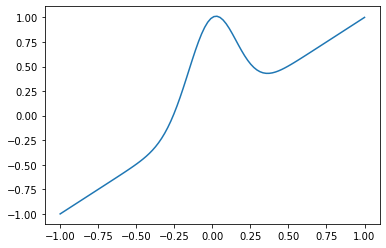

In [31]:
x=np.linspace(-1,1,100)
y=[g(i) for i in x]
plt.plot(x,y)
plt.show()


**(d)** Appliquer cinq intérations de la méthode de dichotomie à la fonction $g$ sur l'intervalle $[-1,1]$ et utiliser le point obtenu comme initialisation de la méthode de Newton-Raphson pour la recherche d'un zéro de $g$.

In [32]:
zero, cpt_ite, erreur, inc = dichotomie(g,-1,1,1e-10,5)
zero2, cpt_ite2, erreur2, inc2 = modnewton(g,dg,zero,1e-10,150)
print (zero2, cpt_ite2, erreur2, inc2)

#On a choisi x0 trop proche du vrai zéro de la fonction

-0.24800368780890014 150 0.035312987131131235 [0.01700837001366795, 0.017015256095874898, 0.017022743036750998, 0.017029646574372226, 0.017037153027147672, 0.01704407409482292, 0.017051600144773388, 0.017058538817593033, 0.017066084550518668, 0.017073040904027226, 0.017080606406256665, 0.017087580516456452, 0.017095165874851354, 0.017102157818205982, 0.01710976312016485, 0.017116772973602895, 0.017124398307065775, 0.01713142614798449, 0.01713907160143696, 0.017146117507705727, 0.017153783170183456, 0.017160847220147823, 0.017168533181240897, 0.017175615453726256, 0.017183321803583923, 0.017190422377899223, 0.01719814920723381, 0.017205268163175386, 0.017213015563267486, 0.01722015298112317, 0.01722792104382584, 0.017235077004378513, 0.017242865822121922, 0.017250040406653844, 0.01725785007245026, 0.017265043362746674, 0.01727287397019478, 0.017280086048548415, 0.01728793769183845, 0.017295168641053127, 0.017303041414971465, 0.017310291318366477, 0.017318185318300733, 0.0173254542597150

**3.** Modifier la fonction `dichotomie` pour obtenir une fonction
`regulafalsi` mettant en &oelig;uvre la [méthode de la fausse position](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_fausse_position). De la même manière,
modifier la fonction `newton` pour obtenir une fonction `secante` mettant en &oelig;uvre la [méthode de la sécante](http://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_s%C3%A9cante).

In [33]:
def regulaFalsi(f, x0, x1, tol, itermax):
    cpt_iter=0
    res=x0
    if f(x0)*f(x1)>0:
        raise ValueError("Méthode inutilisable")
    
    elif f(x0)*f(x1)<0:
        while cpt_iter<itermax and abs(f(res))>tol:
            x2 = x0 - ((x0-x1) * f(x0))/(f(x0) - f(x1))
            res = x2
            cpt_iter+=1
            if f(res)==0:
                return [res, f(res), cpt_iter]
            
            elif f(x0)*f(x2)<0:
                x1 = x2
            else:
                x0 = x2
    return [res, f(res), cpt_iter]


def f3(x):
    return x**3-x-1

print (regulaFalsi(f3, -3, 2, 1e-10, 1000))


[1.3247179572292538, -6.606892810623322e-11, 28]


## Exercice bonus (variantes de la méthode de la fausse position)

Le phénomène de rétention d'une des bornes d'encadrement observé lors de l'application de la méthode de la fausse position à la résolution numérique d'une équation non linéaire dans $\mathbb{R}$ a pour effet de diminuer sa vitesse de convergence, ce qui la rend parfois moins efficace que la méthode de dichotomie. Pour corriger ce défaut, plusieurs variantes ont été introduites. On propose dans cet exercice de les tester sur quelques exemples.

Pour décrire de manière explicite ces modifications, on adopte les notations suivantes. On suppose disposer initialement d'un intervalle $[x^{(0)},x^{(1)}]$ non vide de $\mathbb{R}$ et d'une application continue $f$ de $[x^{(0)},x^{(1)}]$ dans $\mathbb{R}$, telle que $f(x^{(0)})f(x^{(1)})<0$, ce qui assure l'existence d'un zéro $\xi$ de $f$. On pose alors $y^{(0)}=f(x^{(0)})$ et $y^{(1)}=f(x^{(1)})$. À l'étape $k$, avec $k$ un entier naturel non nul, on pose
$$
x^{(k+1)}=\frac{x^{(k-1)}y^{(k)}-x^{(k)}y^{(k-1)}}{y^{(k)}-y^{(k-1)}}\text{ et }y^{(k+1)}=f(x^{(k+1)}).
$$
Si $y^{(k+1)}y^{(k)}<0$, on passe à l'étape suivante. En revanche, si $y^{(k+1)}y^{(k)}>0$, on fait la mise à jour suivante
$$
x^{(k)}=x^{(k-1)}\text{ et }y^{(k)}=\alpha\,y^{(k-1)}
$$
avant de passer à l'étape suivante, avec
* $\alpha=\frac{1}{2}$ pour la <a href="https://doi.org/10.1007/BF01934364">méthode Illinois</a>,
* $\alpha=\frac{y^{(k)}}{y^{(k)}+y^{(k+1)}}$ pour la <a href="https://doi.org/10.1007/BF01932959">méthode Pegasus</a>,
* $\alpha=\frac{y^{(k)}-y^{(k+1)}}{y^{(k)}}$ si cette quantité est strictement positive, $\alpha=\frac{1}{2}$ sinon, pour la <a href="https://doi.org/10.1007/BF01951936">méthode d'Anderson-Björck</a>.

**1.** Sur le modèle de la fonction `regulafalsi` écrite dans l'exercice précédent, écrire des fonctions mettant en &oelig;uvre chacune des variantes données ci-dessus.

In [28]:
def illinois(y1,y2):
    return 0.5

def Pegasus(y1,y2):
    return (y2/(y1+y2))

def Bjorck(y1,y2):
    if((y1-y2)/y1)>0:
        return (y1-y2)/y1
    else :
        return 0.5


def fausseposition(f, a, b, tol, itermax):
    if f(a)*f(b)>0:
        print ("Erreur")
        return
    yk0=f(a)
    yk1=f(b)
    xk2=xk0=a
    xk1=b
    cpt=0
    while cpt<itermax and abs(f(xk2))>tol:
        xk2 = ((xk0*yk1)-(xk1*yk0))/(yk1-yk0)
        yk2=f(xk2)
        cpt+=1
        if yk2*yk1<0:
            xk0=xk1
            xk1=xk2
            yk0=yk1
            yk1=yk2
            continue
        elif yk2*yk1>0:
            xk0=xk1
            xk1=xk2
            yk0=yk1
            #mettre la fonction illinois, Pegasus ou Bjorck
            yk1=illinois(yk1,yk2)*yk0
            #yk1=Pegasus(yk1,yk2)*yk0
            #yk1=Bjorck(yk1,yk2)*yk0 
        else:
            return (xk2,f(xk2),cpt)
    return (xk2,f(xk2),cpt)
            
print(fausseposition(f, -math.pi/2, math.pi, 1e-10, 10000)) 

(2.246005589382802, 9.543632550901293e-11, 404)


**1.** Tester ces fonctions, ainsi que les fonctions `dichotomie` et `regulafalsi`, pour la détermination du zéro de la fonction $f(x)=11x^{11}-1$. On utilisera l'intervalle $\left[\frac{1}{10},1\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [29]:
def h(x):
    return 11*(x**11)-1

print(dichotomie(h,1/10,1,1e-12,1000))
print("--------")
print(regulaFalsi(h,1/10,1,1e-12,1000))
print("--------")
print(fausseposition(h,1/10,1,1e-12,1000))

(0.804133097503791, 40, 1.7332801860447944e-12, [1.7596756426917919, 0.11249999999999993, 0.05624999999999991, 0.028124999999999956, 0.014062499999999978, 0.007031249999999933, 0.003515625000000022, 0.0017578125000000666, 0.0008789062499999778, 0.0004394531249999334, 0.00021972656249991118, 0.00010986328124995559, 5.4931640624977796e-05, 2.7465820312433387e-05, 1.3732910156272204e-05, 6.866455078191613e-06, 3.433227539151318e-06, 1.716613769575659e-06, 8.583068847878295e-07, 4.291534424494259e-07, 2.145767212802241e-07, 1.0728836064011205e-07, 5.364418032005602e-08, 2.6822090215539163e-08, 1.341104505225843e-08, 6.705522470618064e-09, 3.3527611797978807e-09, 1.6763805898989403e-09, 8.381902949494702e-10, 4.1909509196358385e-10, 2.095474904706407e-10, 1.0477374523532035e-10, 5.2386872617660174e-11, 2.6193380797678856e-11, 1.3096634887688197e-11, 6.548317443844098e-12, 3.274158721922049e-12, 1.6370238498097933e-12, 8.184564137536654e-13, 4.092282068768327e-13, 0.804133097503791])
-------

**2.** Reprendre la question précédente avec la fonction $f(x)=1-\frac{1}{x^5}$. On utilisera l'intervalle $\left[\frac{1}{2},2\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [31]:
def h(x):
    return 1-(1/(x**5))

print(dichotomie(h,1/2,2,1e-12,100))
print("--------")
print(regulaFalsi(h,1/2,2,1e-12,100))
print("--------")
print(fausseposition(h,1/2,2,1e-12,100))


(0.9999999999998863, 41, -5.684341886080801e-13, [0.20267999999999997, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.00146484375, 0.000732421875, 0.0003662109375, 0.00018310546875, 9.1552734375e-05, 4.57763671875e-05, 2.288818359375e-05, 1.1444091796875e-05, 5.7220458984375e-06, 2.86102294921875e-06, 1.430511474609375e-06, 7.152557373046875e-07, 3.5762786865234375e-07, 1.7881393432617188e-07, 8.940696716308594e-08, 4.470348358154297e-08, 2.2351741790771484e-08, 1.1175870895385742e-08, 5.587935447692871e-09, 2.7939677238464355e-09, 1.3969838619232178e-09, 6.984919309616089e-10, 3.4924596548080444e-10, 1.7462298274040222e-10, 8.731149137020111e-11, 4.3655745685100555e-11, 2.1827872842550278e-11, 1.0913936421275139e-11, 5.4569682106375694e-12, 2.7284841053187847e-12, 1.3642420526593924e-12, 6.821210263296962e-13, 3.410605131648481e-13, 0.9999999999998863])
--------
[1.0006240918282265, 0.003114625279101113, 100]
--------
(1.0000000000000018, 8.881784197001

**3.** Reprendre la question précédente avec la fonction $f(x)=1-\frac{1}{x}$. On utilisera l'intervalle $\left[\frac{1}{2},2\right]$ comme encadrement initial et une tolérance égale à $10^{-12}$.

In [32]:
def m(x):
    return 1 - 1/x

print(dichotomie(m,1/2,2,1e-12,1000))
print("--------")
print(regulaFalsi(m,1/2,2,1e-12,1000))
print("--------")
print(fausseposition(m,1/2,2,1e-12,1000))

(0.9999999999998863, 41, -1.1368683772161603e-13, [0.675, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.00146484375, 0.000732421875, 0.0003662109375, 0.00018310546875, 9.1552734375e-05, 4.57763671875e-05, 2.288818359375e-05, 1.1444091796875e-05, 5.7220458984375e-06, 2.86102294921875e-06, 1.430511474609375e-06, 7.152557373046875e-07, 3.5762786865234375e-07, 1.7881393432617188e-07, 8.940696716308594e-08, 4.470348358154297e-08, 2.2351741790771484e-08, 1.1175870895385742e-08, 5.587935447692871e-09, 2.7939677238464355e-09, 1.3969838619232178e-09, 6.984919309616089e-10, 3.4924596548080444e-10, 1.7462298274040222e-10, 8.731149137020111e-11, 4.3655745685100555e-11, 2.1827872842550278e-11, 1.0913936421275139e-11, 5.4569682106375694e-12, 2.7284841053187847e-12, 1.3642420526593924e-12, 6.821210263296962e-13, 3.410605131648481e-13, 0.9999999999998863])
--------
[1.0000000000009095, 9.094947017729282e-13, 40]
--------
(1.0, 0.0, 2)


## Exercice 2 (calcul de $\sqrt{2}$)
Dans cet exercice, on cherche à calculer une approximation de $\sqrt{2}$ de diverses façons.

**1.** On peut tout d'abord obtenir une valeur approchée de $\sqrt{2}$ en cherchant la racine positive de la fonction polynomiale $f(x)=x^2-2$. Pour cela, appliquer successivement à $f$ les méthodes de dichotomie et de de la fausse position sur l'intervalle $[1,2]$, de Newton-Raphson et de la sécante.

In [33]:
def f1(x):
    return x**2-2

def df1(x):
    return 2*x

print(dichotomie(f1,1,2,1e-12,1000))
print("--------")
print(fausseposition(f1,1,2,1e-12,1000))
print("--------")
print(newton(f1,df1,1,1e-12,1000))

(1.414213562372879, 40, -6.108447081487611e-13, [1.0, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12, 3.637978807091713e-12, 1.8189894035458565e-12, 9.094947017729282e-13, 4.547473508864641e-13, 1.414213562372879])
--------
(1.4142135623732732, 5.040412531798211e-13, 76)
--------
[1.4142135623730951, 6, 4.440892098500626e-16, [0.5, 0.08333333333333326, 0.002450980392156854, 2.12389

**2.** On peut également se servir de méthodes de point fixe, définies à partir des applications suivantes
$$
g_1(x)=2+x-x^2,\ g_2(x)=\frac{2}{x}\text{ et }g_3(x)=\frac{x+2}{x+1},
$$
considérées sur l'intervalle $[1,2]$.

**(a)** Parmi les trois fonctions ci-dessus, lesquelles conduisent à une méthode de point fixe convergente ?

**(b)** Vérifier cette affirmation en calculant les vingt premiers termes des suites définies par les relations de récurrence
$$
x^{(0)}=\frac{1}{2}\text{ et },\forall k\in\mathbb{N},\ x^{(k+1)}=g_i(x^{(k)}),\ i\in\{1,2,3\}.
$$

## Exercice 3 (bassins de convergence de la méthode de Newton-Raphson)

On s'intéresse à la recherche des solutions complexes de l'équation $z^3=1$ par la méthode de Newton-Raphson. On considère pour cela la fonction d'une variable complexe $f(z)=z^3-1$, qui s'annule en chaque point $z$ du plan complexe tel que $z^3=1$.

**1.** &Eacute;crire deux fonctions `f` et `df` renvoyant respectivement les valeurs de $f(z)$ et de $f'(z)$ en un point quelconque $z$ de $\mathbb{C}$.

**2.** Pour tout entier naturel $n$ supérieur ou égal à $2$, on définit une grille de pas $h=\frac{3}{n-1}$ couvrant le carré $[-1,5,1,5]\times[-1,5\mathrm{i},1,5\mathrm{i}]$.

&Eacute;crire un programme résolvant, pour une valeur donnée de $n$, l'équation $f(z)=0$ avec une tolérance égale à $10^{-4}$ par la méthode de Newton-Raphson utilisant successivement chaque point de la grille $z_{ij}=-1,5(1+\mathrm{i})+(i+\mathrm{i}j)h$, $0\leq i,j\leq n$ comme initialisation. Pour chaque couple $(i,j)$, stocker dans le tableau à deux dimensions `nrac` le numéro $k$ ($k=0$, $1$ ou $2$) de la racine cubique complexe de l'unité $e^{\mathrm{i}\frac{2k\pi}{3}}$ vers laquelle la méthode aura convergée à partir de $z_{ij}$ (on posera $k=3$ lorsque la méthode n'a pas convergé après $100$ itérations) et dans le tableau `niter` le nombre d'itérations nécessaires pour atteindre la convergence (en stockant le nombre maximal d'itérations autorisées en l'absence de convergence).

Pour automatiser le processus de reconnaissance de la racine approchée par la valeur `zero` renvoyée, on pourra utiliser les instructions suivantes (ci-dessous, `racines` désigne un tableau contenant les trois racines cubiques complexes de l'unité et `tol` est la tolérance du critère d'arrêt de la méthode de Newton-Raphson) :

`d=racines-[zero,zero,zero]
 m,k=min(abs(d)),argmin(abs(d))
 if (abs(m)>tol):
     k=3`
     
Lancer le programme avec $n$ valant $100$ et une tolérance fixée à $10^{-4}$ (compte tenu du nombre important d'appels de la méthode de Newton--Raphson).

**3.** &Agrave; l'aide des commandes `matshow(nrac.T)` et `matshow(niter.T)`, afficher une représentation des bassins de convergence de la méthode.

**4.** Refaire des tracés pour des pas de grille plus petits (c'est-à-dire de plus grandes valeurs de $n$). Que dire des &laquo; frontières &raquo; des trois bassins de convergence de la méthode ?